In [13]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy.engine import reflection
from sqlalchemy.orm import sessionmaker

In [14]:
import numpy as np
import pandas as pd

In [15]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [16]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [17]:
# reflect an existing database into a new model
# Create connection string & engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# reflect the tables with reflection
insp = reflection.Inspector.from_engine(engine)
print(insp.get_table_names())

# reflect the tables with automap
Base = automap_base()
Base.prepare(engine, reflect=True)

['measurement', 'station']


In [18]:
# We can view all of the classes that automap found
print(Base.classes.measurement)
print(Base.classes.station)

<class 'sqlalchemy.ext.automap.measurement'>
<class 'sqlalchemy.ext.automap.station'>


In [94]:
# Save references to each table
measurements = Base.classes.measurement
stations = Base.classes.station

In [95]:
# Create our session (link) from Python to the DB
connection = engine.connect()
Session = sessionmaker(bind = engine)
session = Session()

# Exploratory Climate Analysis

Date: 2017-01-01, Precipitation: 0.0
Date: 2017-01-02, Precipitation: 0.0
Date: 2017-01-03, Precipitation: 0.0
Date: 2017-01-04, Precipitation: 0.0
Date: 2017-01-05, Precipitation: 0.0
Date: 2017-01-06, Precipitation: 0.0
Date: 2017-01-07, Precipitation: 0.0
Date: 2017-01-08, Precipitation: 0.0
Date: 2017-01-09, Precipitation: 0.0
Date: 2017-01-10, Precipitation: 0.0
Date: 2017-01-11, Precipitation: 0.0
Date: 2017-01-12, Precipitation: 0.0
Date: 2017-01-13, Precipitation: 0.0
Date: 2017-01-14, Precipitation: 0.0
Date: 2017-01-15, Precipitation: 0.0
Date: 2017-01-16, Precipitation: 0.0
Date: 2017-01-17, Precipitation: 0.0
Date: 2017-01-18, Precipitation: 0.0
Date: 2017-01-19, Precipitation: 0.0
Date: 2017-01-20, Precipitation: 0.0
Date: 2017-01-21, Precipitation: 0.0
Date: 2017-01-22, Precipitation: 0.16
Date: 2017-01-23, Precipitation: 0.0
Date: 2017-01-24, Precipitation: 0.04
Date: 2017-01-25, Precipitation: 0.03
Date: 2017-01-26, Precipitation: 0.0
Date: 2017-01-27, Precipitation: 0.

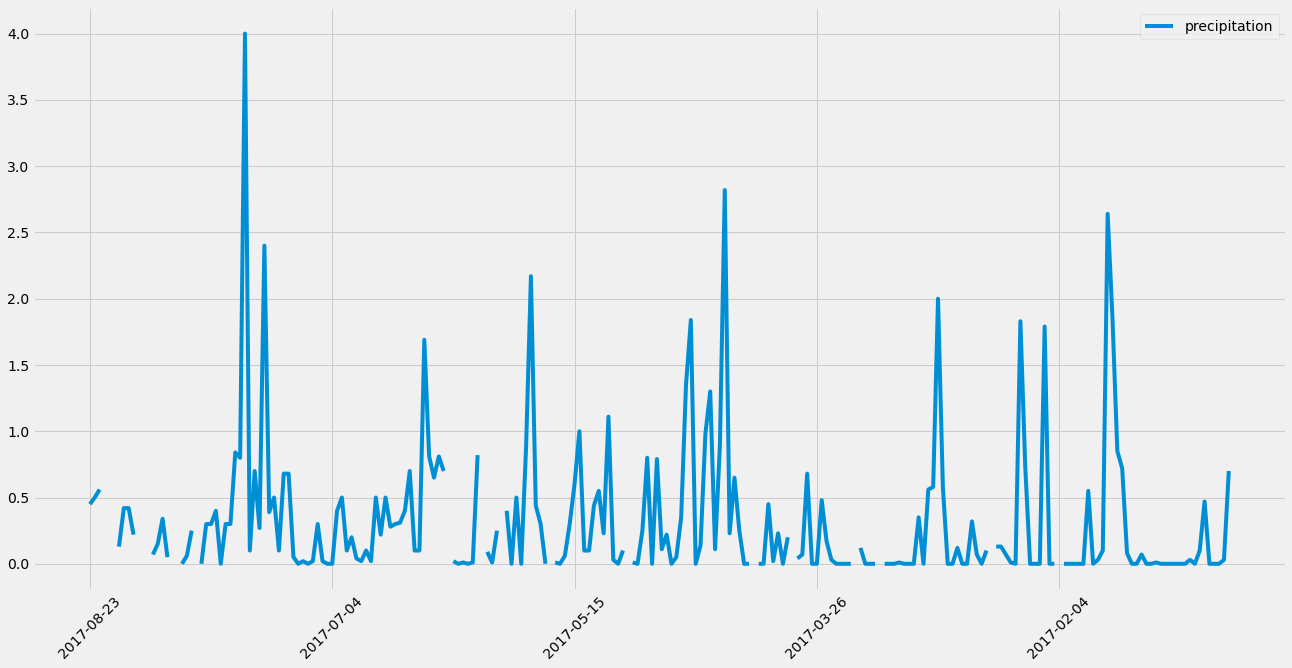

In [126]:
dictConstr1 = []
dictConstr2 = []

# Design a query to retrieve the last 12 months of precipitation data and plot the results'
result = session.query(measurements).filter(measurements.date.like("2017%"))
prcp_list = []
for row in result:
    print("Date: " + row.date + ", Precipitation: " + str(row.prcp))
    prcp_list.append(row.date + "," + str(row.prcp))
    dictConstr1.append(row.date)
    dictConstr2.append(row.prcp)
    
# Calculate the date 1 year ago from the last data point in the database
lastEntry = prcp_list[len(prcp_list)-1]
lastEntryYear = (int(lastEntry.split(',')[0].split('-')[0])) - 1
lastEntryMonth = lastEntry.split(',')[0].split('-')[1]
lastEntryDay = lastEntry.split(',')[0].split('-')[2]
lastEntryYearPrior = str(lastEntryYear) + '-' + lastEntryMonth + '-' + lastEntryDay
print('-----------------------------------------')
# Perform a query to retrieve the data and precipitation scores
result2 = session.query(measurements).filter(measurements.date.like(lastEntryYearPrior + "%"))

for row in result2:
    print("Date: " + row.date + ", Precipitation: " + str(row.prcp))
    prcp_list.append(row.date + "," + str(row.prcp))
    dictConstr1.append(row.date)
    dictConstr2.append(row.prcp)
    
# Save the query results as a Pandas DataFrame and set the index to the date column
prcpDict = {} 
for key in dictConstr1: 
    for value in dictConstr2: 
        prcpDict[key] = value 
        dictConstr2.remove(value) 
        break
        
prcp_df = pd.DataFrame.from_dict(prcpDict,orient='index',columns=['precipitation'])

# Sort the dataframe by date
prcp_df = prcp_df.sort_index(ascending=False)
print('----------------------------')
print(prcp_df)
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(rot=45)
plt.legend(loc='best')
plt.rcParams["figure.figsize"] = [20, 10]
plt.show()

In [97]:
# Use Pandas to calcualte the summary statistics for the precipitation data

#mean
mean = prcp_df['precipitation'].mean()
print("mean: " + str(mean))

#median
median = prcp_df['precipitation'].median()
print("median: " + str(median))
#standard deviation
stdev = prcp_df['precipitation'].std()
print("standard deviation: " + str(stdev))

mean: 0.3236238532110092
median: 0.1
standard deviation: 0.5524609257236603


In [112]:
# Design a query to show how many stations are available in this dataset?
result3 = session.query(measurements)
stationList = []
for row in result3:
    stationList.append(row.station)
pd.DataFrame(stationList,columns=['station'])

,station
0,USC00519397
1,USC00519397
2,USC00519397
3,USC00519397
4,USC00519397
...,...
19545,USC00516128
19546,USC00516128
19547,USC00516128
19548,USC00516128


In [119]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
pd.DataFrame((pd.DataFrame(stationList,columns=['station'])['station'].value_counts()),columns=['station']).sort_values(['station'],ascending=False)

,station
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [145]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
activeStation = 'USC00519281'
tempList = []
for row in result3:
    if(row.station == activeStation):
        tempList.append(row.tobs)
        
minTemp = min(tempList)
maxTemp = max(tempList)
avgTemp = 0
for x in tempList:
    avgTemp += x
avgTemp = avgTemp / len(tempList)
print("min: " + str(minTemp) + ", max: " + str(maxTemp) + ", avg: " + str(round(avgTemp,2)))

min: 54.0, max: 85.0, avg: 71.66


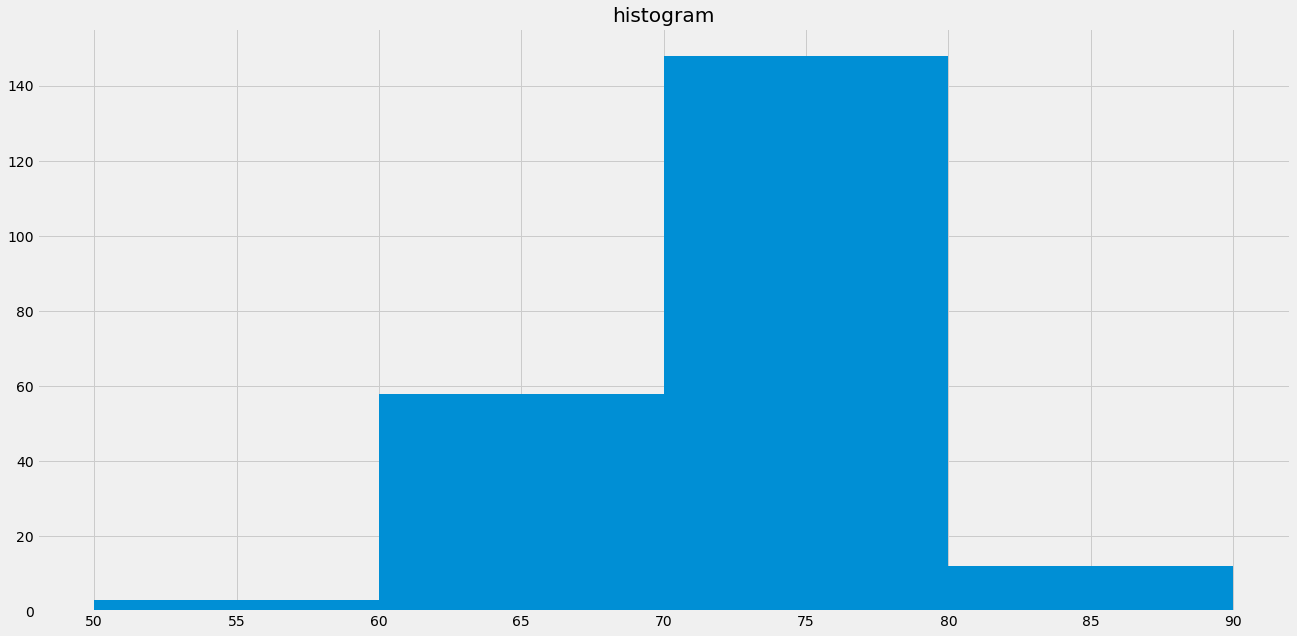

In [151]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
result4 = session.query(measurements).filter(measurements.station.like("USC00519281%")).filter(measurements.date.like('2017%'))
tempList2 = []
for row in result4:
    if(row.station == activeStation):
        tempList2.append(row.tobs)
plt.hist(tempList2, bins = [50,60,70,80,90]) 
plt.title("histogram") 
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
